In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential, layers

In [ ]:
!gdown 1BFJp8jzwhr0jSyE8IBRhyf58o5cSAcFp

Downloading...
From: https://drive.google.com/uc?id=1BFJp8jzwhr0jSyE8IBRhyf58o5cSAcFp
To: /content/nifty_train.csv
100% 247k/247k [00:00<00:00, 86.1MB/s]


In [ ]:
!gdown 1PpZkI41tcIwohqt5iO1QwT_SXt8O4V9A

Downloading...
From: https://drive.google.com/uc?id=1PpZkI41tcIwohqt5iO1QwT_SXt8O4V9A
To: /content/nifty_test.csv
100% 27.5k/27.5k [00:00<00:00, 35.5MB/s]


In [ ]:
train = pd.read_csv("/content/nifty_train.csv")["Close"]
test = pd.read_csv("/content/nifty_test.csv")["Close"]

In [ ]:

# train = 100*train.pct_change().shift(-1)

        
#         if isTrain == True:
#             #Step2: Neutralize returns to avoid data imbalance
#             df['NextRets'] = df['NextRets'] - np.mean(df['NextRets'])

In [ ]:
# train = train.div(10).round(2)
# test = test.div(10).round(2)

In [ ]:
train = train.dropna()
test = test.dropna()

In [ ]:
train.shape

(3178,)

In [ ]:
train.head()

0    6144.350098
1    6179.399902
2    6178.549805
3    6274.299805
4    6279.100098
Name: Close, dtype: float64

In [ ]:
test.head()

0    14018.500000
1    14132.900391
2    14199.500000
3    14146.250000
4    14137.349609
Name: Close, dtype: float64

In [ ]:
train.describe

<bound method NDFrame.describe of 0        6144.350098
1        6179.399902
2        6178.549805
3        6274.299805
4        6279.100098
            ...     
3203    13601.099609
3204    13749.250000
3205    13873.200195
3206    13932.599609
3207    13981.950195
Name: Close, Length: 3178, dtype: float64>

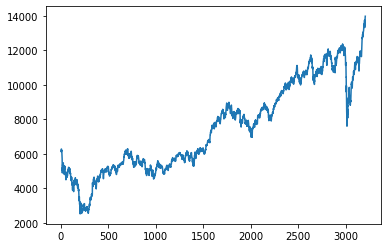

In [ ]:
plt.plot(train)

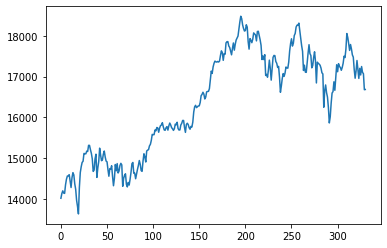

In [ ]:
plt.plot(test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
train = scaler.fit_transform(train.to_frame()).reshape((len(train)))
test = scaler.transform(test.to_frame()).reshape((len(test)))

In [ ]:
xtrain, ytrain = [], []
for i in range(60, len(train)):
    xtrain.append(train[i-60:i])
    ytrain.append(train[i])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [ ]:
xtrain[0]

array([0.31595645, 0.3190155 , 0.31894131, 0.3272981 , 0.32771705,
       0.32848073, 0.32709738, 0.31705616, 0.32082216, 0.32140689,
       0.30983832, 0.29775043, 0.29578235, 0.27763739, 0.23430427,
       0.20729199, 0.23383299, 0.21900026, 0.24953853, 0.2400035 ,
       0.24058823, 0.23070848, 0.22807708, 0.2437695 , 0.25653379,
       0.25831423, 0.24423205, 0.2277105 , 0.22658463, 0.20360018,
       0.20196374, 0.20992343, 0.23371081, 0.24251706, 0.24024786,
       0.24058823, 0.22956079, 0.23282056, 0.22574676, 0.23359736,
       0.23965   , 0.239506  , 0.24096355, 0.23558727, 0.21197879,
       0.20423294, 0.20922082, 0.19614672, 0.19866029, 0.20437694,
       0.20490934, 0.1832297 , 0.19389495, 0.1727128 , 0.17532238,
       0.1788964 , 0.18202964, 0.20538937, 0.20114334, 0.20126552])

In [ ]:
xtrain = xtrain.reshape((xtrain.shape[0], xtrain.shape[1],1))

In [ ]:
xtrain.shape

(3118, 60, 1)

In [ ]:
ytrain.shape

(3118,)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
def build_model(d):
    return Sequential([layers.Input(shape=(60,1)),
                       layers.LSTM(32),
                       layers.Dropout(d),
                       layers.Dense(16, activation="relu"),
                       layers.BatchNormalization(),
                       layers.Dense(1)],
                      name="StockLSTM")
model = build_model(0.2)
model.summary()
path="model.hdf5"
checkpoint = ModelCheckpoint(filepath=path, monitor="MAPE", verbose=1, save_best_only=True, mode='min')
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[tf.keras.losses.MeanAbsolutePercentageError(name="MAPE")])

Model: "StockLSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,929
Non-trainable params: 32
______________________________________________________

In [ ]:
ytrain.shape

(3118,)

In [ ]:
model.fit(xtrain, ytrain, epochs=100, batch_size=32, callbacks=[checkpoint])

Epoch 1/100
96/98 [============================>.] - ETA: 0s - loss: 0.1119 - MAPE: 68979.9297
Epoch 1: MAPE improved from inf to 67572.81250, saving model to model.hdf5
98/98 [==============================] - 5s 22ms/step - loss: 0.1107 - MAPE: 67572.8125
Epoch 2/100
96/98 [============================>.] - ETA: 0s - loss: 0.0070 - MAPE: 4984.0737
Epoch 2: MAPE improved from 67572.81250 to 4882.76221, saving model to model.hdf5
98/98 [==============================] - 2s 23ms/step - loss: 0.0070 - MAPE: 4882.7622
Epoch 3/100
96/98 [============================>.] - ETA: 0s - loss: 0.0038 - MAPE: 36175.4258
Epoch 3: MAPE did not improve from 4882.76221
98/98 [==============================] - 2s 22ms/step - loss: 0.0038 - MAPE: 35437.8945
Epoch 4/100
98/98 [==============================] - ETA: 0s - loss: 0.0035 - MAPE: 20603.2305
Epoch 4: MAPE did not improve from 4882.76221
98/98 [==============================] - 2s 22ms/step - loss: 0.0035 - MAPE: 20603.2305
Epoch 5/100
97/98 [==

In [ ]:
model.load_weights("/content/model.hdf5")

In [ ]:
for_pred=np.hstack([train[len(train)-60:len(train)], test])

In [ ]:
for_pred.shape

(391,)

In [ ]:
ypred = []
for i in range(331):
    inp = for_pred[i:i+60].reshape(1,60,1)
    ypred.append(model.predict(inp)[0,0])

In [ ]:
ypred

[0.8115815,
 0.8143514,
 0.8204701,
 0.8254802,
 0.82427603,
 0.8230826,
 0.83259755,
 0.84235585,
 0.8491286,
 0.8510424,
 0.8527155,
 0.8451543,
 0.8349923,
 0.84313166,
 0.85208714,
 0.8524165,
 0.8417682,
 0.8316214,
 0.815288,
 0.8028456,
 0.7903951,
 0.8180853,
 0.8459685,
 0.86200345,
 0.871685,
 0.8754184,
 0.885031,
 0.88726526,
 0.8871699,
 0.88983303,
 0.8898924,
 0.89687014,
 0.8989037,
 0.89423186,
 0.88813037,
 0.8795003,
 0.8620733,
 0.8581403,
 0.8706877,
 0.8808811,
 0.8569609,
 0.85994,
 0.8690344,
 0.8879269,
 0.88614935,
 0.87816465,
 0.87612677,
 0.88230544,
 0.88805157,
 0.8828947,
 0.8760894,
 0.8729268,
 0.86295456,
 0.85195214,
 0.85762817,
 0.8596785,
 0.86429983,
 0.853167,
 0.83857447,
 0.8427297,
 0.86092657,
 0.8597842,
 0.86756533,
 0.8590016,
 0.8580219,
 0.8642563,
 0.86898875,
 0.8685372,
 0.8429914,
 0.843636,
 0.84815013,
 0.8517175,
 0.840577,
 0.8337761,
 0.83707136,
 0.83540434,
 0.841884,
 0.85230273,
 0.8658965,
 0.8715928,
 0.8602805,
 0.856151

In [ ]:
test.shape

(331,)

In [ ]:
from sklearn.metrics import r2_score

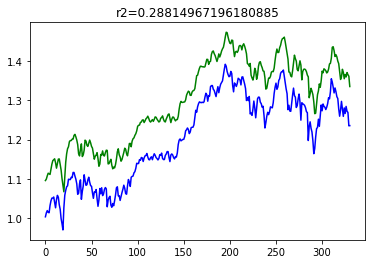

In [ ]:
plt.plot(ypred,color='green')
plt.plot(test,color='blue')
plt.title(f"r2={r2_score(test, np.array(ypred))}")
plt.show()

In [ ]:
scaler.inverse_transform(ypred[0].reshape(1, -1))

array([[15077.71230884]])